In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
import math

## Load your csv into a dataframe
### Note: your csv must have a date (yyyy-mm-dd format) column with the column name 'ds' and the variable you want to forecast with the column name 'y'

In [10]:
input_path = '/Users/adleyhemphill/Downloads/sessions_time_country.csv'
output_path = '/Users/adleyhemphill/Downloads/sessions_time_country_output.csv'

In [11]:
df = pd.read_csv(input_path)
#df = df.drop(df.index[df.y==0])
#df['y'] = np.log(df['y'])

In [12]:
df.head(20)

,ds,y,Segment
0,2015-01-01,1711.0,CL
1,2015-01-01,1711.0,AR
2,2015-01-01,0.0,CO
3,2015-01-01,0.0,EC
4,2015-01-02,3422.0,CL
5,2015-01-02,3422.0,AR
6,2015-01-02,0.0,CO
7,2015-01-02,0.0,EC
8,2015-01-03,0.0,CL
9,2015-01-03,1711.0,AR


## Set how long you'd like to forecast

In [5]:
forecast_period = 365

## Train the model, forecast the number of days set above

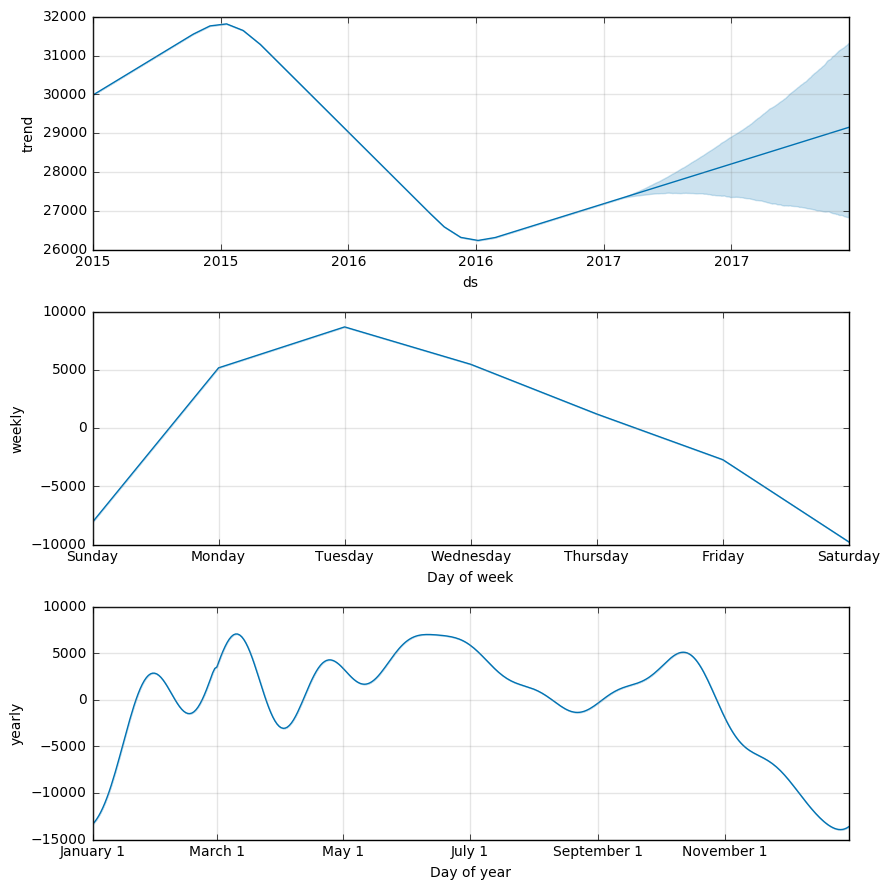

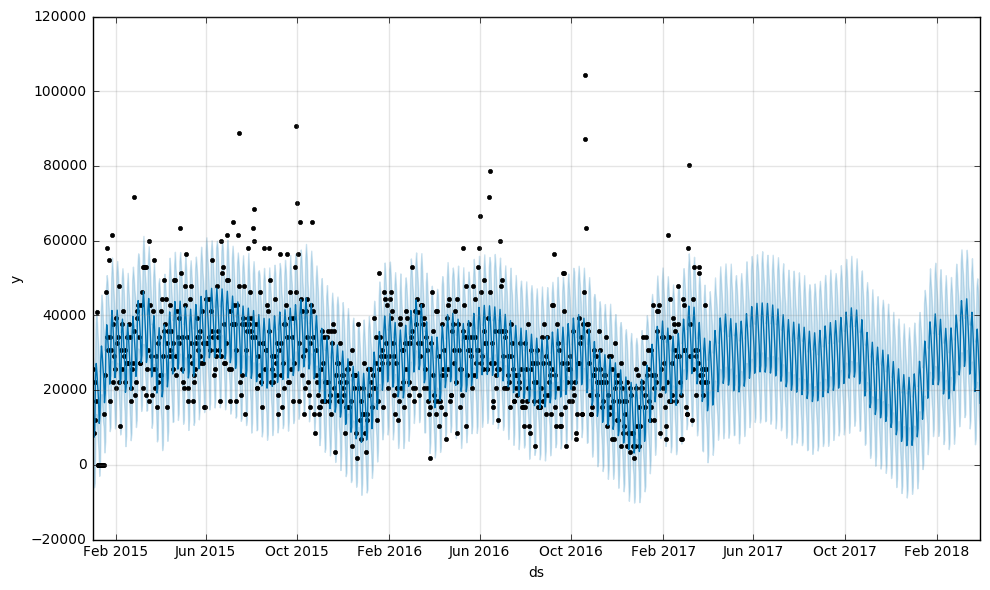

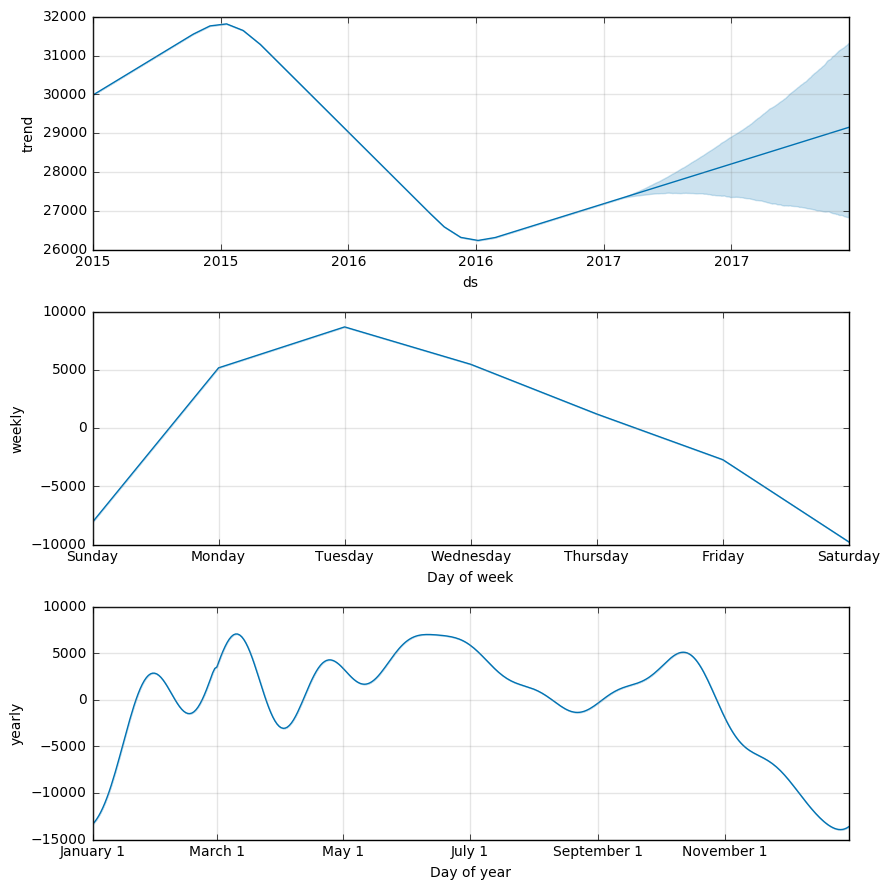

In [20]:
m = Prophet()

temp_df = df.groupby('ds').sum().reset_index()
#temp_df = df
m.fit(temp_df)
future = m.make_future_dataframe(periods = forecast_period)
forecast = m.predict(future)
m.plot(forecast)
m.plot_components(forecast)

In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(output_path)